In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics


ModuleNotFoundError: No module named 'wordcloud'

In [8]:
!pip install wordcloud
from wordcloud import WordCloud


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

In [29]:
df = pd.read_csv(r'C:\Users\charm\OneDrive\Desktop\raise\Fake.csv')


In [30]:
df.head()



,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


<Axes: xlabel='label', ylabel='count'>

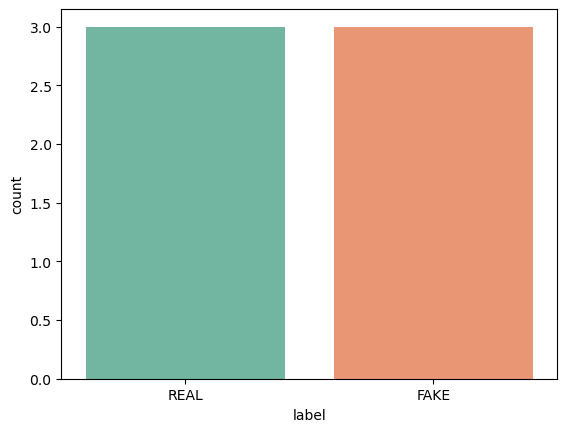

In [13]:
sns.countplot(data=df, x='label', hue='label', palette='Set2', legend=False)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['subject'], test_size=0.3, random_state=7)




In [37]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)



In [38]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

In [40]:
y_pred = pac.predict(tfidf_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted') 

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1 Score: {f1_score:.2f}")



Accuracy: 52.31%
F1 Score: 0.52


C:\Users\charm\AppData\Local\Temp\ipykernel_16668\495607646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subject', palette='Set2')


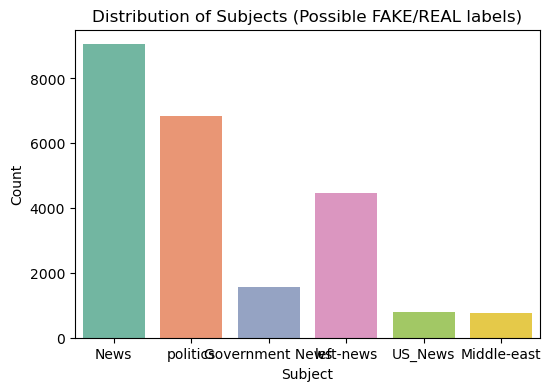

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='subject', palette='Set2')
plt.title("Distribution of Subjects (Possible FAKE/REAL labels)")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.show()


In [44]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
